In [ ]:
#| default_exp core

In [ ]:
%load_ext autoreload
%autoreload 2

# module name here

> API details.

In [1]:
#| hide
from nbdev.showdoc import *
from fastcore.test import *
from cgshop2021_pyutils import *
from PIL import Image
import numpy
import random

In [60]:
import numpy
from matplotlib import pyplot
from matplotlib.animation import FuncAnimation
import json
from ipywidgets import Layout, IntProgress
from IPython import display
from matplotlib.patches import Circle, Rectangle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation

%matplotlib notebook

In [ ]:
#| export
def say_hello(to):
    "Say hello to someone"
    return f"Hello {to}."

A function to say hello some someone.

In [ ]:
say_hello("World")

In [ ]:
test_eq(say_hello("Jeff"), "Hello Jeff.")

In [160]:
numpy.arccos(numpy.dot([0, -1], [-1, 0]))

1.5707963267948966

In [ ]:
class World:
    def __init__(self):
        

In [142]:
class Robot:
    def __init__(self, id, start, target):
        self.id = id
        self.name = str(id)
        self.start = start
        self.target = target

In [143]:
r = Robot(0, (0, 0), (5, 5))

In [145]:
r.start

(0, 0)

In [3]:
idb = InstanceDatabase("../data/cgshop_2021_instances_01.zip")

for i in idb:
    start_state = []
    goal_state = []
    robot_colors = []
    obstacles = []
    max_extent = 0
    print(i.name)
    print(f"Number of Robots: {i.number_of_robots}")
    for r in range(i.number_of_robots):
        # print(f"Robot {r} starts at {i.start_of(r)} and has to go to {i.target_of(r)}")
        start_state.append((i.start_of(r)[0], i.start_of(r)[1]))
        goal_state.append((i.target_of(r)[0], i.target_of(r)[1]))
        max_extent = max([max_extent, i.start_of(r)[0], i.start_of(r)[1]])
        robot_colors.append([random.randint(0, 254), random.randint(0, 254), random.randint(0, 254)])

    for o in i.obstacles:
        # print(f"{o} is blocked")
        obstacles.append((o[0], o[1]))
    break

clouds_00000_20x20_40_160
Number of Robots: 160


In [148]:
i.__dict__

{'start': [(0, 15),
  (18, 12),
  (9, 9),
  (6, 11),
  (2, 7),
  (14, 14),
  (9, 12),
  (15, 9),
  (9, 15),
  (7, 6),
  (19, 4),
  (0, 19),
  (5, 4),
  (10, 14),
  (17, 8),
  (9, 14),
  (15, 10),
  (0, 13),
  (8, 8),
  (17, 14),
  (4, 17),
  (14, 15),
  (13, 19),
  (13, 2),
  (10, 0),
  (8, 19),
  (3, 6),
  (18, 2),
  (13, 15),
  (6, 19),
  (15, 7),
  (16, 4),
  (11, 13),
  (11, 4),
  (19, 8),
  (2, 19),
  (10, 3),
  (2, 14),
  (15, 1),
  (2, 18),
  (11, 0),
  (5, 0),
  (1, 10),
  (19, 13),
  (9, 18),
  (5, 7),
  (11, 12),
  (15, 5),
  (5, 3),
  (3, 17),
  (7, 11),
  (15, 6),
  (7, 19),
  (2, 17),
  (19, 1),
  (5, 1),
  (1, 6),
  (5, 11),
  (1, 15),
  (13, 4),
  (1, 13),
  (5, 15),
  (6, 15),
  (18, 4),
  (7, 7),
  (1, 7),
  (12, 12),
  (18, 5),
  (8, 14),
  (8, 5),
  (19, 2),
  (8, 16),
  (10, 9),
  (5, 18),
  (15, 4),
  (13, 6),
  (6, 17),
  (8, 15),
  (17, 6),
  (10, 7),
  (2, 13),
  (3, 15),
  (8, 17),
  (18, 8),
  (3, 2),
  (9, 16),
  (9, 19),
  (13, 1),
  (11, 2),
  (12, 14),
  (

In [2]:
from ipywidgets import Layout, IntProgress
from IPython.display import display
import time

In [29]:
max_count = 100

f = IntProgress(min=0, max=max_count) # instantiate the bar
display(f) # display the bar

count = 0
while count <= max_count:
    f.value += 1 # signal to increment the progress bar
    time.sleep(.1)
    count += 1

IntProgress(value=0)

In [145]:
class Animation:
    def __init__(self, starts, goals, obstacles, actions):
        self.starts = []
        for start in starts:
            self.starts.append((start[0], start[1]))
        self.goals = []
        for goal in goals:
            self.goals.append((goal[0], goal[1]))
        self.obstacles = []
        for obstacle in obstacles:
            self.obstacles.append((obstacle[0], obstacle[1]))
        self.actions = []
        if actions:
            for action in actions:
                self.actions.append([])
                for movement in action:
                    self.actions[-1].append((movement[0], movement[1]))
        self.paths = numpy.cumsum(numpy.insert(numpy.array(self.actions), 0, numpy.array(self.starts), axis=1), axis=1)

        self.x_min_orig = min(min([i[0] for i in self.starts]), 
                              min([i[0] for i in self.goals]))
        self.y_min_orig = min(min([i[1] for i in self.starts]), 
                              min([i[1] for i in self.goals]))
        self.x_max_orig = max(max([i[0] for i in self.starts]), 
                              max([i[0] for i in self.goals]))
        self.y_max_orig = max(max([i[1] for i in self.starts]), 
                              max([i[1] for i in self.goals]))
        
        if self.obstacles:
            self.x_min_orig = min(self.x_min_orig, min([i[0] for i in self.obstacles]))
            self.y_min_orig = min(self.y_min_orig, min([i[1] for i in self.obstacles]))
            self.x_max_orig = max(self.x_max_orig, max([i[0] for i in self.obstacles]))
            self.y_max_orig = max(self.y_max_orig, max([i[1] for i in self.obstacles]))
        
        aspect = (self.x_max_orig - self.x_min_orig) / (self.y_max_orig - self.y_min_orig)

        
        plt.ioff()

        self.fig = plt.figure(frameon=False, figsize=(5 * aspect, 5))
        self.ax = self.fig.add_subplot(111, aspect='equal')
        self.fig.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=None, hspace=None)
        # self.ax.set_frame_on(False)

        self.patches = []
        self.artists = []
        self.agents = {}
        self.agent_names = {}
        
        plt.xlim(self.x_min_orig, self.x_max_orig + 1)
        plt.ylim(self.y_min_orig, self.y_max_orig + 1)

        for obstacle in self.obstacles:
            self.patches.append(Rectangle((obstacle[0], obstacle[1]), 1, 1, facecolor='black', edgecolor='none'))

        # create agents:
        # draw goals first
        for i, goal in enumerate(self.goals):
            self.patches.append(Rectangle((goal[0], goal[1]), 1, 1, 
                                          facecolor='white',
                                          edgecolor='gray', linewidth=1, alpha=0.5))
            
            if len(self.starts) <= 200:
            # if (self.x_max_orig - self.x_min_orig <= 25) and (self.y_max_orig - self.y_min_orig) <= 25:
                self.artists.append(self.ax.text(goal[0] + 0.5, goal[1] + 0.25, str(i), 
                                                 color='gray', fontsize=6, alpha=0.5, 
                                                 horizontalalignment='center', verticalalignment='center'))
        
        self.T = max([len(self.actions[i]) - 1 for i in range(len(self.actions))])
        style = {'description_width': 'initial'}
        self.progress = IntProgress(min=0, max=int(self.T + 1) * 10, 
                                    description='Creating Animation', style=style)
        display.display(self.progress) # display the bar
        
        for i in range(len(self.starts)):
            name = str(i)
            self.agents[i] = Rectangle((self.starts[i][0], self.starts[i][1]), 1, 1, 
                                       facecolor='#bdbdbd',
                                       edgecolor='gray')
            self.agents[i].original_face_color = '#bdbdbd'
            self.patches.append(self.agents[i])
            if len(self.starts) <= 200:
            # if (self.x_max_orig - self.x_min_orig <= 25) and (self.y_max_orig - self.y_min_orig) <= 25:
                self.agent_names[i] = self.ax.text(self.starts[i][0], self.starts[i][1], name, fontsize=6)
                self.agent_names[i].set_horizontalalignment('center')
                self.agent_names[i].set_verticalalignment('center')
                self.artists.append(self.agent_names[i])
                
        self.animation = animation.FuncAnimation(self.fig, self.animate_func,
                                                 init_func=self.init_func,
                                                 frames=int(self.T + 1) * 10,
                                                 interval=50,
                                                 blit=True)
        
        self.video = self.animation.to_html5_video()
        display.clear_output(wait=False)
        html = display.HTML(self.video)
        display.display(html)

    def save(self, file_name):
        self.animation.save(
            file_name,
            fps=(1000 / 50.),
            dpi=200,
            savefig_kwargs={"pad_inches": 0, "bbox_inches": "tight"})

    @staticmethod
    def show():
        plt.show()
        
    @staticmethod
    def close():
        plt.close()

    def init_func(self):
        [p.remove() for p in reversed(self.ax.patches)]
        [a.remove() for a in reversed(self.ax.artists)]
        plt.axis('off')
        
        for p in self.patches:
            self.ax.add_patch(p)
        for a in self.artists:
            self.ax.add_artist(a)
        return self.patches + self.artists

    def animate_func(self, t):
        self.progress.value = t
        for k in range(len(self.paths)):
            pos = self.get_state(t / 10, self.paths[k])
            self.agents[k].xy = (pos[0], pos[1])
            self.agents[k].width = 1
            self.agents[k].height = 1
            if len(self.agent_names) > 0:
                self.agent_names[k].set_position((pos[0] + 0.5, pos[1] + 0.75))
            
        mins_maxs = {'x_min': numpy.inf, 'y_min': numpy.inf, 'x_max': -numpy.inf, 'y_max': -numpy.inf}
        for patch in self.patches:
            mins_maxs['x_min'] = min(mins_maxs['x_min'], patch.xy[0])
            mins_maxs['y_min'] = min(mins_maxs['y_min'], patch.xy[1])
            mins_maxs['x_max'] = max(mins_maxs['x_max'], patch.xy[0])
            mins_maxs['y_max'] = max(mins_maxs['y_max'], patch.xy[1])

        x_min = min(self.x_min_orig, mins_maxs['x_min'])
        y_min = min(self.y_min_orig, mins_maxs['y_min'])
        x_max = max(self.x_max_orig, mins_maxs['x_max'])
        y_max = max(self.y_max_orig, mins_maxs['y_max'])
        plt.xlim(x_min, x_max + 1)
        plt.ylim(y_min, y_max + 1)
            
        agents_array = []
        for i, agent in self.agents.items():
            # reset all colors
            agent.set_facecolor(agent.original_face_color)
            agent.set_edgecolor('gray')
            agents_array.append(agent.xy)
            if agent.xy == self.goals[i]:
                agent.set_facecolor('#4daf4a')
                agent.set_edgecolor('#4daf4a')
                

        # check drive-drive collisions
        agents_array = numpy.array(agents_array)
        norms = numpy.zeros((agents_array.shape[0], agents_array.shape[0]))
        for i in range(1, len(agents_array)):
            temp = agents_array[i, np.newaxis] - agents_array[:]
            norms[i, :] = np.linalg.norm(temp, axis=1)
        
        collisions = numpy.argwhere((norms > 0) & (norms < 0.999999))
        if collisions.size > 0:
            for c in collisions:
                if c[0] < c[1]:
                    self.agents.get(c[0]).set_facecolor('#e41a1c')
                    self.agents.get(c[1]).set_facecolor('#e41a1c')
                    print(f"Collision between {c[0]} and {c[1]} at time {t / 10}.")

        """agents_array = [agent for _, agent in self.agents.items()]
        for i in range(0, len(agents_array)):
            for j in range(i + 1, len(agents_array)):
                d1 = agents_array[i]
                d2 = agents_array[j]
                pos1 = np.array(d1.xy)
                pos2 = np.array(d2.xy)
                if np.linalg.norm(pos1 - pos2) < 0.999999:
                    d1.set_facecolor('red')
                    d2.set_facecolor('red')
                    print(f"Collision between {i} and {j} at time {t / 10}.")"""

        return self.patches + self.artists

    @staticmethod
    def get_state(t, path):
        if int(t) <= 0:
            return np.array(path[0])
        elif int(t) >= len(path):
            return np.array(path[-1])
        else:
            pos_last = np.array(path[int(t) - 1])
            pos_next = np.array(path[int(t)])
            pos = (pos_next - pos_last) * (t - int(t)) + pos_last
            return pos

In [146]:
actions = []

for i in range(len(start_state)):
    actions.append([(1, 0), 
                  (0, -1),
                  (0, -1),
                  (-1, 0), 
                  (0, 1),
                   (1, 0), 
                  (0, -1),
                  (0, -1),
                  (-1, 0), 
                  (0, 1),
                   (1, 0), 
                  (0, -1),
                  (0, -1),
                  (-1, 0), 
                  (0, 1),
                   (1, 0), 
                  (0, -1),
                  (0, -1),
                  (-1, 0), 
                  (0, 1),
                   (1, 0), 
                  (0, -1),
                  (0, -1),
                  (-1, 0), 
                  (0, 1)])

In [147]:
%%time
a = Animation(start_state, goal_state, obstacles, actions)

CPU times: user 2min 16s, sys: 3.95 s, total: 2min 20s
Wall time: 3min


In [148]:
%%time
a.save(file_name="../outputs/test.mp4")

CPU times: user 3min 22s, sys: 6.12 s, total: 3min 29s
Wall time: 5min 6s


In [ ]:
def is_valid_move():
    if numpy.arccos(numpy.dot([0, -1], [-1, 0])) > 0:
        return False
    return True

In [114]:
def create_solution_file(instance, actions, outdir):
    action_map = {(0, 1): "N", (0, -1): "S", (1, 0): "E", (-1, 0): "W", (0, 0): None}
    directional_actions = actions
    steps = []
    
    for agent in range(len(actions)):
        for action in range(len(actions[agent])):
            directional_actions[agent][action] = action_map[actions[agent][action]]
        steps.append({str(t): directional_actions[agent][t] 
                      for t in range(len(directional_actions[agent])) 
                      if directional_actions[agent][t] is not None})
    
    file = {}
    file["instance"] = instance.name
    file["steps"] = steps
    file = json.dumps(file, indent=4)
    
    with open(f"{outdir}/{instance.name}_sol.json", "w") as outfile:
        outfile.write(file)

In [112]:
create_solution_file(list(idb)[0], actions, "../outputs")

In [ ]:
%%timeit
f = lambda x: Rectangle((x[0], x[1]), 1, 1, facecolor='gray', edgecolor='gray')
starts = numpy.array(start_state)
numpy.apply_along_axis(f, 1, starts)

In [ ]:
%%timeit
agents = {}
for i in range(len(starts)):
    agents[i] = Rectangle((starts[i][0], starts[i][1]), 1, 1, 
                               facecolor='gray',
                               edgecolor='gray')

<IPython.core.display.Javascript object>


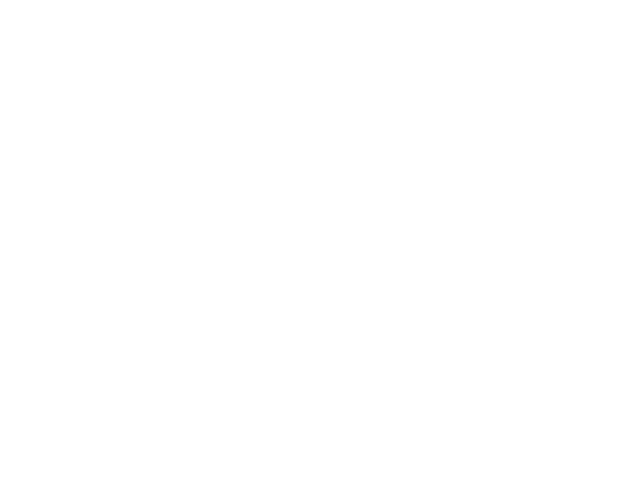

In [43]:
x = np.linspace(0, 2 * np.pi, 100)

fig = plt.figure()

lines = plt.plot([])
line = lines[0]
plt.xlim(0, 2 * np.pi)
plt.ylim(-1.1, 1.1)

def animate(frame):
    y = np.sin(x + 2 * np.pi * frame / 100)
    line.set_data((x, y))

anim = FuncAnimation(fig, animate, frames=100, interval=20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [ ]:
col.properties()

In [ ]:
agents

In [ ]:
a.targets[0].get_edgecolor()

In [ ]:
a.targets[0].set_edgecolor('#4daf4a')
a.targets[0].get_edgecolor()

In [ ]:
%%timeit
t = 33
for k in range(len(a.paths)):
    if int(t) <= 0:
        pos = np.array(a.paths[k][0])
    elif int(t) >= len(a.paths[k]):
        pos = np.array(a.paths[k][-1])
    else:
        pos_last = np.array(a.paths[k][int(t) - 1])
        pos_next = np.array(a.paths[k][int(t)])
        pos = (pos_next - pos_last) * (t - int(t)) + pos_last
    # pos = a.get_state(t / 10, a.paths[k])
    pos = [0, 0]
    a.agents[k].xy = (pos[0], pos[1])
    a.agents[k].width = 1
    a.agents[k].height = 1
    a.agent_names[k].set_position((pos[0] + 0.5, pos[1] + 0.75))

In [ ]:
%%timeit
agents_array = []
for _, agent in a.agents.items():
    # reset all colors
    agent.set_facecolor(agent.original_face_color)
    agents_array.append(agent.xy)

In [ ]:
numpy.array(a.paths).shape

In [3]:
#!/usr/bin/env python3
from matplotlib.patches import Circle, Rectangle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation

In [ ]:
Colors = ['green', 'blue', 'orange']


class Animation:
    def __init__(self, my_map, starts, goals, paths):
        self.my_map = np.transpose(my_map)
        # self.my_map = np.flip(np.transpose(my_map), 1)
        self.starts = []
        for start in starts:
            self.starts.append((start[0], start[1]))
        self.goals = []
        for goal in goals:
            self.goals.append((goal[0], goal[1]))
        self.paths = []
        if paths:
            for path in paths:
                self.paths.append([])
                for loc in path:
                    self.paths[-1].append((loc[0], loc[1]))

        aspect = len(self.my_map) / len(self.my_map[0])

        self.fig = plt.figure(frameon=False, figsize=(5 * aspect, 5))
        self.ax = self.fig.add_subplot(111, aspect='equal')
        self.fig.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=None, hspace=None)
        # self.ax.set_frame_on(False)

        self.patches = []
        self.artists = []
        self.agents = {}
        self.agent_names = {}
        
        x_min = -0.5
        y_min = -0.5
        x_max = len(self.my_map) - 0.5
        y_max = len(self.my_map[0]) - 0.5
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)

        for i in range(len(self.my_map)):
            for j in range(len(self.my_map[0])):
                if self.my_map[i][j]:
                    self.patches.append(Rectangle((i, j), 1, 1, facecolor='gray', edgecolor='gray'))

        # create agents:
        self.T = 0
        # draw goals first
        for i, goal in enumerate(self.goals):
            self.patches.append(Rectangle((goal[0], goal[1]), 1, 1, 
                                          facecolor='white',
                                          edgecolor=Colors[i % len(Colors)], linewidth=2, alpha=0.5))
            self.artists.append(self.ax.text(goal[0] + 0.5, goal[1] + 0.5, str(i), 
                                             color=Colors[i % len(Colors)], fontsize=8, alpha=0.5, 
                                             horizontalalignment='center', verticalalignment='center'))
        for i in range(len(self.paths)):
            name = str(i)
            self.agents[i] = Rectangle((starts[i][0], starts[i][1]), 1, 1, 
                                       facecolor=Colors[i % len(Colors)],
                                       edgecolor=Colors[i % len(Colors)])
            self.agents[i].original_face_color = Colors[i % len(Colors)]
            self.patches.append(self.agents[i])
            self.T = max(self.T, len(paths[i]) - 1)
            self.agent_names[i] = self.ax.text(starts[i][0], starts[i][1], name, fontsize=8)
            self.agent_names[i].set_horizontalalignment('center')
            self.agent_names[i].set_verticalalignment('center')
            self.artists.append(self.agent_names[i])

        self.animation = animation.FuncAnimation(self.fig, self.animate_func,
                                                 init_func=self.init_func,
                                                 frames=int(self.T + 1) * 10,
                                                 interval=100,
                                                 blit=True)

    def save(self, file_name, speed):
        self.animation.save(
            file_name,
            fps=10 * speed,
            dpi=200,
            savefig_kwargs={"pad_inches": 0, "bbox_inches": "tight"})

    @staticmethod
    def show():
        plt.show()

    def init_func(self):
        [p.remove() for p in reversed(self.ax.patches)]
        [a.remove() for a in reversed(self.ax.artists)]
        plt.axis('off')
        
        for p in self.patches:
            self.ax.add_patch(p)
        for a in self.artists:
            self.ax.add_artist(a)
        return self.patches + self.artists

    def animate_func(self, t):
        for k in range(len(self.paths)):
            pos = self.get_state(t / 10, self.paths[k])
            self.agents[k].xy = (pos[0], pos[1])
            self.agents[k].width = 1
            self.agents[k].height = 1
            self.agent_names[k].set_position((pos[0] + 0.5, pos[1] + 0.75))

        x_min = min([0] + [agent.xy[0] for _, agent in self.agents.items()])
        y_min = min([0] + [agent.xy[1] for _, agent in self.agents.items()])
        x_max = max([len(self.my_map)] + [agent.xy[0] + agent.width for _, agent in self.agents.items()])
        y_max = max([len(self.my_map[0])] + [agent.xy[1] + agent.height for _, agent in self.agents.items()])
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
            
        # reset all colors
        for _, agent in self.agents.items():
            agent.set_facecolor(agent.original_face_color)

        # check drive-drive collisions
        agents_array = [agent for _, agent in self.agents.items()]
        for i in range(0, len(agents_array)):
            for j in range(i + 1, len(agents_array)):
                d1 = agents_array[i]
                d2 = agents_array[j]
                pos1 = np.array(d1.xy)
                pos2 = np.array(d2.xy)
                if np.linalg.norm(pos1 - pos2) < 1:
                    d1.set_facecolor('red')
                    d2.set_facecolor('red')
                    print(f"Collision between {i} and {j} at time {t / 10}.")

        return self.patches + self.artists

    @staticmethod
    def get_state(t, path):
        if int(t) <= 0:
            return np.array(path[0])
        elif int(t) >= len(path):
            return np.array(path[-1])
        else:
            pos_last = np.array(path[int(t) - 1])
            pos_next = np.array(path[int(t)])
            pos = (pos_next - pos_last) * (t - int(t)) + pos_last
            return pos

In [ ]:
my_map = numpy.array([[False, False, True, False, False, False, False, False],
                      [False, False, False, True, False, False, False, False],
                      [False, False, True, False, False, False, False, False],
                      [False, False, False, False, False, False, False, False],
                      [False, False, False, False, False, False, False, True],
                      [False, False, False, False, False, True, False, False],
                      [False, False, False, False, False, False, True, False],
                      [False, False, False, False, False, False, False, False]])
starts = [(1, 1), (7, 6), (4, 3), (0, 0), (1, 0)]
goals = [(3, 0), (0, 0), (1, 1), (5, 4), (5, 6)]
paths = [[(1, 1), (1, 0), (2, 0), (3, 0), (3, -1), (3, 0)], 
         [(7, 6), (7, 5), (7, 4), (7, 3), (7, 2), (7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (2, 1), (2, 0), (1, 0), (0, 0)], 
         [(4, 3), (4, 2), (3, 2), (3, 2), (3, 2), (3, 1), (2, 1), (1, 1)], 
         [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (5, 4)], 
         [(1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 6)]]

a = Animation(my_map, starts, goals, paths)

In [ ]:
robot_colors

In [ ]:
fig = pyplot.figure(figsize=(5, 5))
dimension = (max_extent + 1, max_extent + 1)

def init():
    labels = numpy.zeros(dimension, dtype=str)
    data = numpy.zeros(max_extent + 1, max_extent + 1, 3)
    for i in range(len(current_state)):
        labels[current_state[i][0], current_state[i][1]] = str(i)
        data[current_state[i][0], current_state[i][1]] = robot_colors[i]
    seaborn.heatmap(data, cbar=False, annot=labels, fmt='')

def animate(i):
    pyplot.cla()
    # data = numpy.random.rand(dimension[0], dimension[1])
    # labels = numpy.random.choice(['X', 'O', '+', '-'], size=dimension)
    seaborn.heatmap(data, cbar=False, annot=labels, fmt='')

anim = FuncAnimation(fig, animate, init_func=init, frames=20, repeat=False)

pyplot.show()

In [ ]:
w, h = 512, 512
data = numpy.zeros((h, w, 3), dtype=numpy.uint8)
data[0:256, 0:128] = [0, 255, 0] # white patch in upper left
Image.fromarray(data, 'RGB')

In [ ]:
fig, ax = pyplot.subplots()
mat = ax.imshow(data, origin='lower')
pyplot.show()

In [ ]:
data.shape

In [ ]:
#| hide
from nbdev import nbdev_export
nbdev_export()